In [ ]:
from google.colab import files
files.upload()

Saving 1.png to 1.png


{'1.png': b'\x00\x00\x00 ftypavif\x00\x00\x00\x00avifmif1miafMA1B\x00\x00\x00\xf2meta\x00\x00\x00\x00\x00\x00\x00(hdlr\x00\x00\x00\x00\x00\x00\x00\x00pict\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00libavif\x00\x00\x00\x00\x0epitm\x00\x00\x00\x00\x00\x01\x00\x00\x00\x1eiloc\x00\x00\x00\x00D\x00\x00\x01\x00\x01\x00\x00\x00\x01\x00\x00\x01\x1a\x00\x01\x1b\xf2\x00\x00\x00(iinf\x00\x00\x00\x00\x00\x01\x00\x00\x00\x1ainfe\x02\x00\x00\x00\x00\x01\x00\x00av01Color\x00\x00\x00\x00jiprp\x00\x00\x00Kipco\x00\x00\x00\x14ispe\x00\x00\x00\x00\x00\x00\x05\xdc\x00\x00\x02\xa8\x00\x00\x00\x10pixi\x00\x00\x00\x00\x03\x08\x08\x08\x00\x00\x00\x0cav1C\x81\x05\x0c\x00\x00\x00\x00\x13colrnclx\x00\x01\x00\r\x00\x06\x80\x00\x00\x00\x17ipma\x00\x00\x00\x00\x00\x00\x00\x01\x00\x01\x04\x01\x02\x83\x04\x00\x01\x1b\xfamdat\x12\x00\n\n\x19jn\xddO\xc1\x01\r\x06\x842\xe0\xb7\x04\x11@\x01\x04\x10A@\xf6\x87\x00\xa4y\xc2\xb3\x0e0\xd2o\x00\xacMk\xcb\\\x8f\xe2+\x15W5\xea\xae\x91w\xd3\xc54\xbfK&n\x18g\xddM\xbeO\x7f\x07\

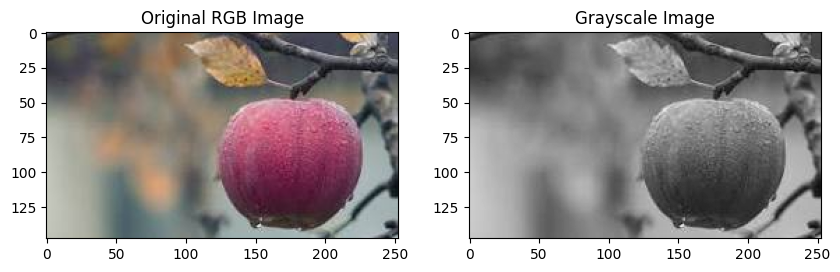

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGB image
image_path = "/content/image.jpg"  # Replace with the path to your RGB image
rgb_image = Image.open(image_path)

# Convert the RGB image to a NumPy array
rgb_array = np.array(rgb_image)

# Apply the conversion formula to obtain the grayscale image
gray_array = 0.299 * rgb_array[:, :, 0] + 0.587 * rgb_array[:, :, 1] + 0.114 * rgb_array[:, :, 2]

# Display the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original RGB Image")
plt.imshow(rgb_array)
plt.axis("on")

plt.subplot(1, 2, 2)
plt.title("Grayscale Image")
plt.imshow(gray_array, cmap="gray")
plt.axis("on")

plt.show()

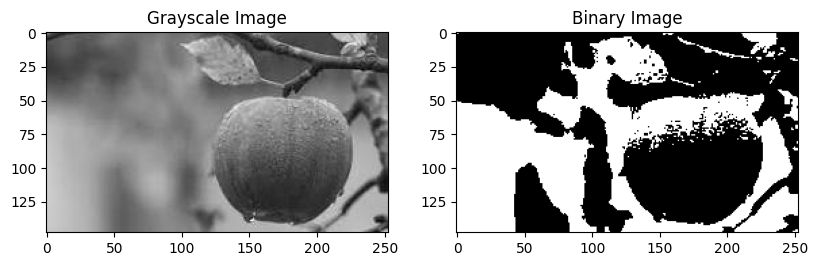

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGB image
image_path = "/content/image.jpg"  # Replace with the path to your RGB image
rgb_image = Image.open(image_path)

# Apply binary thresholding
threshold_value = 128
binary_array = np.where(gray_array > threshold_value, 255, 0)

# Display the original, grayscale, and binary images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
plt.title("Grayscale Image")
plt.imshow(gray_array, cmap="gray")
plt.axis("on")

plt.subplot(1, 3, 3)
plt.title("Binary Image")
plt.imshow(binary_array, cmap="gray")
plt.axis("on")

plt.show()


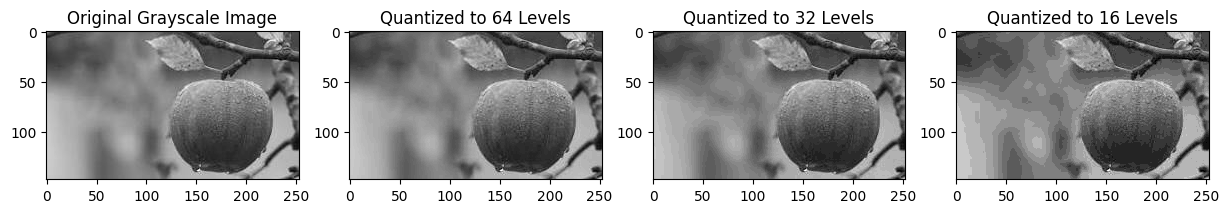

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = "/content/image.jpg"  # Replace with the path to your grayscale image
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to quantize the image to the specified number of levels
def quantize_image(image, levels):
    # Normalize the image to the range [0, 1]
    normalized_image = image / 255.0

    # Quantize the normalized image to the specified levels
    quantized_image = (normalized_image * (levels - 1)).astype(np.uint8)

    # Scale the quantized image back to the range [0, 255]
    quantized_image = (quantized_image * (255.0 / (levels - 1))).astype(np.uint8)

    return quantized_image

# Specify the desired number of levels (64, 32, and 16)
levels_list = [64, 32, 16]

# Display the original and quantized images for each level
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 4, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap="gray")
plt.axis("on")

# Quantize and display images for each level
for i, levels in enumerate(levels_list):
    quantized_image = quantize_image(gray_image, levels)

    plt.subplot(1, 4, i + 2)
    plt.title(f"Quantized to {levels} Levels")
    plt.imshow(quantized_image, cmap="gray")
    plt.axis("on")

plt.show()